In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt #also used to generate the legends
from typing import List
import pickle

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension:  PlannerPropMax1


Current folders are:
PlannerPropMax1.0
PlannerPropMax1.1
PlannerPropMax1.2
PlannerPropMax1.3


### uncomment to show all the rows in tables

In [3]:
#display all the rows of the dataframe  
pd.set_option('display.max_rows', None)

# creation of firm dataframes

In [4]:
def merge(dict1, dict2):
    res = {**dict1, **dict2}
    return res

In [5]:
#operating by folders to load the pickle balancesheet dictionary files
fileName=folder+"_balancesheetDict.p"
for k in range(rankNum):
    #which folder
    os.chdir("../"+folder+"."+str(k))
    firmDataTmp=pickle.load(open(fileName, "rb"))
    if k==0: firmData=firmDataTmp
    else: firmData = merge(firmData,firmDataTmp)

# Retrieve a firm

In [6]:
#retrieve a firm with id and rank
def retrieveFirmBalancesheet(id,r):
    return firmData[(id, 0, r)]

In [7]:
#example
#retrieveFirmBalancesheet(2482,0) 
retrieveFirmBalancesheet(0,0)

,firm class type,initial inventories,total costs,revenuesCons,revenuesInv,consGoods inventories,invGoods inventories,consGoods in progr. inventories,invGoods in progr. inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,gross investment in Q,production type
0,0.0,0.000000e+00,14.850575,1.761617,0.0,1.786604e-01,0.0,0.0,0.0,-12.910298,1.940278e+00,0.361285,1.763889,13.086686,0.000000,0.000000,9.0,3.191223,0.000000,0.0
1,0.0,1.786604e-01,14.850575,9.324815,0.0,5.552339e-01,0.0,0.0,0.0,-5.149186,9.701389e+00,2.863209,8.819444,6.031131,0.000000,0.000000,9.0,3.191223,0.000000,0.0
2,0.0,5.552339e-01,14.850575,0.491847,0.0,6.338640e-02,0.0,0.0,0.0,-14.850575,0.000000e+00,0.000000,0.000000,14.850575,0.000000,0.000000,9.0,3.191223,0.000000,0.0
3,0.0,6.338640e-02,14.850575,11.156126,0.0,2.489205e+00,0.0,0.0,0.0,-1.268631,1.358194e+01,4.168754,12.347222,2.503353,0.000000,0.000000,9.0,3.191223,0.000000,0.0
4,0.0,2.489205e+00,14.850575,2.211080,0.0,2.781245e-01,0.0,0.0,0.0,-14.850575,0.000000e+00,0.000000,0.000000,14.850575,0.000000,0.000000,9.0,3.191223,0.000000,0.0
5,0.0,2.781245e-01,14.850575,5.991266,0.0,1.076919e-01,0.0,0.0,0.0,-9.029742,5.820833e+00,1.697320,5.291667,9.558909,0.000000,0.000000,9.0,3.191223,0.000000,0.0
6,0.0,1.076919e-01,13.850575,0.089479,0.0,1.821258e-02,0.0,0.0,0.0,-13.850575,0.000000e+00,0.000000,0.000000,13.850575,0.000000,0.000000,8.0,3.393997,0.017900,0.0
7,0.0,1.821258e-02,13.813044,3.326888,0.0,5.718800e-01,0.0,0.0,0.0,-9.932489,3.880556e+00,1.163487,3.527778,10.285267,0.000000,0.000000,8.0,3.329530,0.014016,0.0
8,0.0,5.718800e-01,13.775102,13.367399,0.0,7.864257e-01,0.0,0.0,0.0,-0.193157,1.358194e+01,3.742297,12.347222,1.427880,0.000000,0.000000,8.0,3.271811,0.010748,0.0
9,0.0,7.864257e-01,13.736857,12.308531,0.0,2.059839e+00,0.0,0.0,0.0,-0.154913,1.358194e+01,3.946685,12.347222,1.389635,0.000000,0.000000,8.0,3.129195,0.000000,0.0


# The allFirmData dataframe

In [8]:
#create a dataframe summing up all the firm dataframes
allFirmData=firmData[list(firmData.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                      #independent copy with a new name

for aFirmUid in list(firmData.keys())[1:]: #from the second to the last
    allFirmData=allFirmData.add(firmData[aFirmUid])

allFirmData.__description__="all firms"

In [9]:
allFirmData

,firm class type,initial inventories,total costs,revenuesCons,revenuesInv,consGoods inventories,invGoods inventories,consGoods in progr. inventories,invGoods in progr. inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,gross investment in Q,production type
0,2740.0,0.000000,212201.973095,16454.094658,0.000000,2327.088676,0.000000,6109.272222,10640.819444,-176670.698095,35531.275000,9558.891730,31933.583333,180268.389762,562.734481,1770.486111,105302.0,58309.076234,0.000000,1164.0
1,2740.0,19077.180342,212201.973095,18960.001216,2327.235099,2735.890237,340.117679,15638.216667,25948.980556,-165328.711984,46873.261111,12867.291715,42450.027778,169751.945317,1051.002901,3035.541667,105302.0,58309.076234,0.000000,1164.0
2,2740.0,44663.205139,212201.973095,22446.264883,7567.309135,3325.428132,1080.372433,26480.716667,37926.713889,-158038.373095,54163.600000,15569.426035,50454.930556,161747.042540,1837.257649,4899.069444,105302.0,58309.076234,0.000000,1164.0
3,2740.0,68813.231120,212201.973095,25830.360751,11496.604232,3532.797936,1721.290423,34140.705556,48992.666667,-155300.778651,56901.194444,16878.253262,55006.222222,157195.750873,2660.741842,6830.222222,105302.0,58309.076234,0.000000,1164.0
4,2740.0,88387.460581,212201.973095,22966.260191,11548.502033,3310.236356,1705.800890,48976.350000,63855.113889,-148227.170317,63974.802778,18463.865623,59163.347222,153038.625873,2178.534447,5611.180556,105302.0,58309.076234,0.000000,1164.0
5,2740.0,117847.501135,212201.973095,27310.347662,12595.962673,4232.120638,1832.936829,59533.422222,79831.109722,-144713.574484,67488.398611,19834.880907,63019.944444,149182.028651,2582.576853,6508.736111,105302.0,58309.076234,0.000000,1164.0
6,2740.0,145429.589411,216280.973095,32100.616171,18793.820519,4936.022522,2452.677421,67884.516667,89165.659722,-146377.249484,69903.723611,21077.454217,67088.250000,149192.723095,3274.257375,8074.458333,109381.0,60113.337001,1111.888428,1164.0
7,2740.0,164438.876332,220344.943413,35466.737435,21709.211091,5599.748976,3278.770497,75576.188889,99483.111111,-143670.051746,76674.891667,22504.007982,70792.513889,149552.429524,2680.939745,6603.208333,113316.0,61861.605442,1658.994401,1164.0
8,2740.0,183937.819473,224629.432457,38262.219386,20689.995295,5614.904590,3349.911313,83365.294444,113758.730556,-143526.196346,81103.236111,23983.161414,75151.361111,149478.071346,2967.845060,7383.930556,117438.0,63738.160111,1916.345833,1164.0
9,2740.0,206088.840903,228805.246997,44085.082496,17561.324319,6640.242927,2779.314772,86113.777778,134456.800000,-143257.545608,85547.701389,25376.376392,79833.111111,148972.135885,3349.070051,8255.902778,121472.0,65280.776147,1826.376192,1164.0


In [10]:
allFirmData.__description__

'all firms'

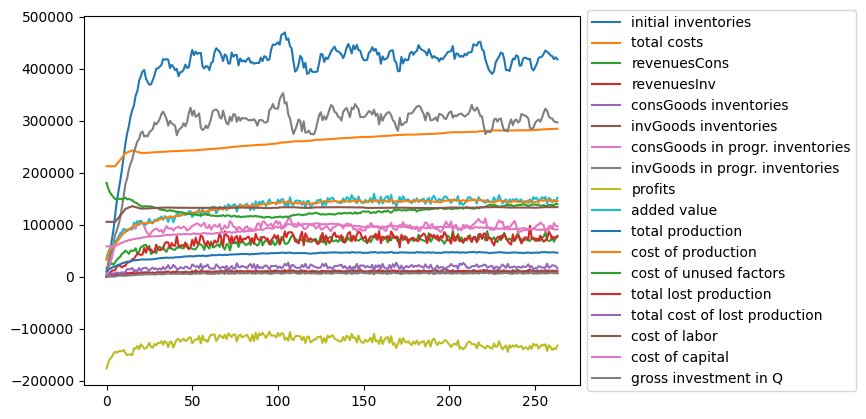

In [11]:
allFirmData.drop(['firm class type', 'production type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<Axes: >

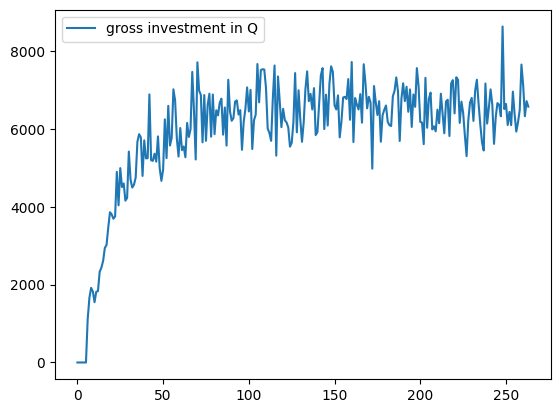

In [12]:
allFirmData[['gross investment in Q']].plot()

<Axes: >

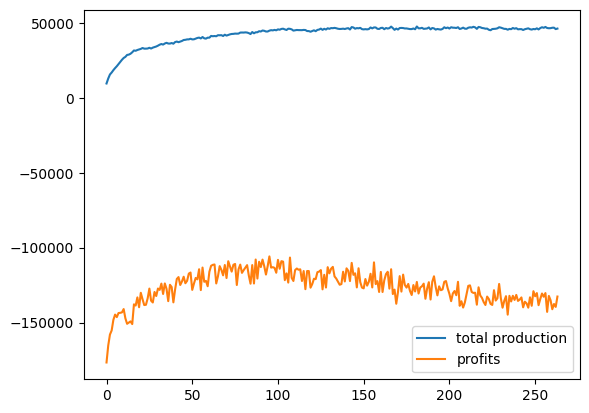

In [13]:
allFirmData[['total production', 'profits']].plot()

<Axes: >

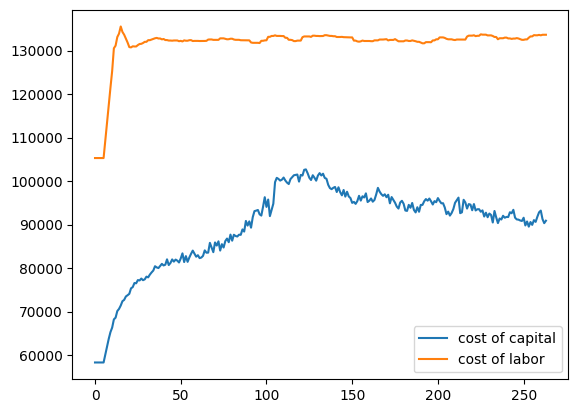

In [14]:
allFirmData[['cost of capital','cost of labor']].plot()

<Axes: >

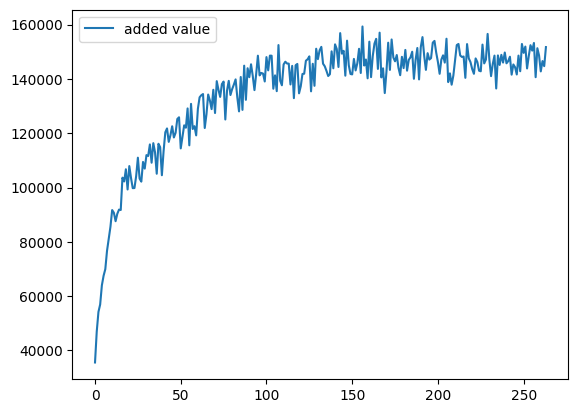

In [15]:
allFirmData[['added value']].plot()

# Considering groups of firms

In [16]:
#summarize a subset of balancesheets of firm with 'firm class type' in a given list
def sumBalancesheetsWithAGivenFirmClassType(classList: List):
    tmpDict={}
    for aFirmUid in list(firmData.keys())[:]:
        if firmData[aFirmUid]['firm class type'].loc[0] in classList:
            tmpDict[aFirmUid]=firmData[aFirmUid]
    print("found",len(tmpDict), "firms")
    
    if tmpDict=={}: return 0 #firms with the required firm class type: not found
        
    allLocalFirmData=tmpDict[list(tmpDict.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                              #independent copy with a new name

    for aFirmUid in list(tmpDict.keys())[1:]: #from the second to the last
        allLocalFirmData=allLocalFirmData.add(tmpDict[aFirmUid])

    memo="firms of groups"
    for g in classList: memo = memo +" "+str(g)
    allLocalFirmData.__description__= memo
    
    return allLocalFirmData


In [17]:
#example with firm class type 0
sumOfBalanceSheetSubset = sumBalancesheetsWithAGivenFirmClassType([0,1])
#sumOfBalanceSheetSubset = sumBalancesheetsWithAGivenFirmClassType([5])

found 9368 firms


In [18]:
sumOfBalanceSheetSubset.__description__

'firms of groups 0 1'

In [19]:
sumOfBalanceSheetSubset

,firm class type,initial inventories,total costs,revenuesCons,revenuesInv,consGoods inventories,invGoods inventories,consGoods in progr. inventories,invGoods in progr. inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,gross investment in Q,production type
0,940.0,0.000000,86673.410187,13116.265942,0.000000,1860.738225,0.000000,0.0,2650.419444,-69045.986576,17627.423611,4484.263495,16956.263889,69717.146298,258.695089,931.333333,47344.0,21452.405557,0.000000,940.0
1,940.0,4511.157669,86673.410187,14804.195135,1211.052806,2045.188923,185.947194,0.0,4988.454167,-67949.729632,18723.680556,4752.608564,17915.819444,68757.590743,244.834642,873.805556,47344.0,21452.405557,0.000000,940.0
2,940.0,7219.590283,86673.410187,14934.610976,2854.244526,2110.865447,397.341557,0.0,5985.756944,-67610.181021,19063.229167,4867.497400,18355.027778,68318.382409,277.630827,984.541667,47344.0,21452.405557,0.000000,940.0
3,940.0,8493.963948,86673.410187,14805.642647,4943.085116,2045.513077,704.648107,0.0,5102.930556,-67565.554632,19107.855556,4866.902141,18489.083333,68184.326854,307.232256,1070.041667,47344.0,21452.405557,0.000000,940.0
4,940.0,7853.091740,86673.410187,14932.071741,4476.475086,2137.012170,628.723021,0.0,5335.763889,-67016.456021,19656.954167,4995.700381,19009.430556,67663.979632,315.967374,1098.847222,47344.0,21452.405557,0.000000,940.0
5,940.0,8101.499080,86673.410187,14835.695686,3920.461714,2103.695651,590.757141,0.0,6144.859722,-67179.439354,19493.970833,4982.276538,18843.625000,67829.785187,311.784494,1076.694444,47344.0,21452.405557,0.000000,940.0
6,940.0,8839.312514,89296.410187,15795.265158,4665.513829,2257.513826,690.565534,0.0,6335.006944,-68391.857409,20904.552778,5385.377356,20385.263889,68911.146298,383.115290,1321.402778,49967.0,22649.854301,727.052835,940.0
7,940.0,9283.086304,91855.789027,16684.705269,5111.808992,2433.822446,687.507930,0.0,6523.213889,-69697.816805,22157.972222,5674.792158,21420.666667,70435.122360,349.192885,1214.902778,52447.0,23825.842702,1101.916280,940.0
8,940.0,9644.544265,94523.727844,17300.113440,5037.379121,2454.568729,656.045476,0.0,7167.386111,-71552.779233,22970.948611,5913.093259,22214.416667,72309.311177,357.888855,1269.236111,55017.0,24986.995191,1268.401093,940.0
9,940.0,10278.000316,97126.882963,18121.098338,5275.045993,2610.887057,796.314761,0.0,8236.479167,-72365.057963,24761.825000,6361.436676,23835.430556,73291.452407,362.566940,1279.888889,57541.0,25978.422439,1215.264315,940.0


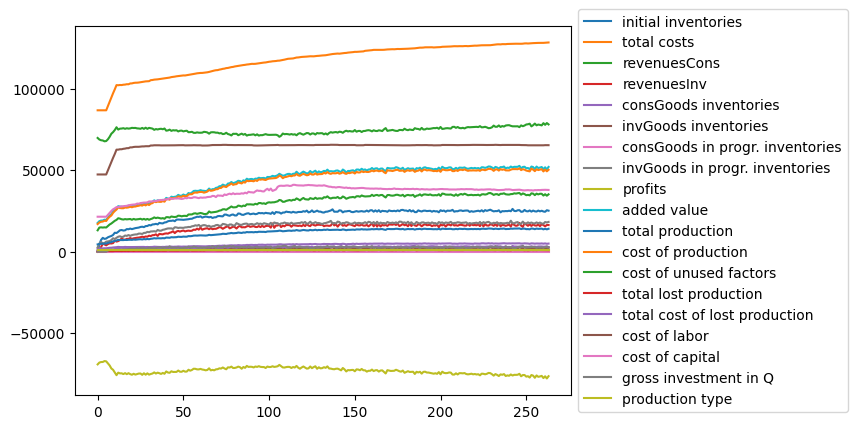

In [20]:
sumOfBalanceSheetSubset.drop(['firm class type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<Axes: >

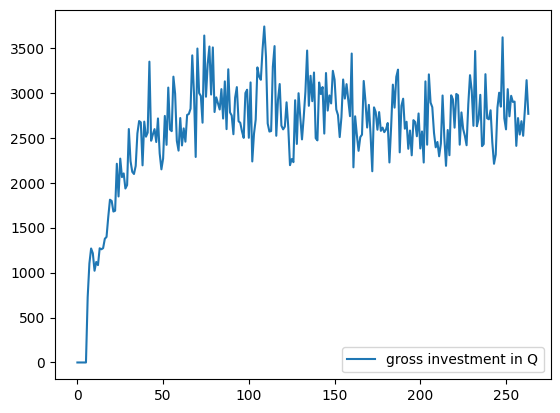

In [21]:
sumOfBalanceSheetSubset[['gross investment in Q']].plot()

<Axes: >

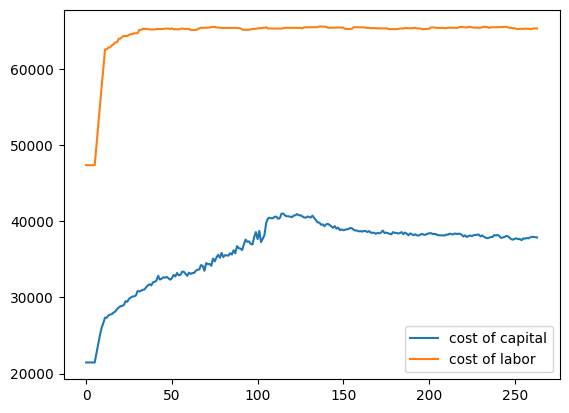

In [22]:
sumOfBalanceSheetSubset[['cost of capital', 'cost of labor']].plot()

# The National Economic Balance Table

In [23]:
allFirmData['consumptions']=allFirmData['revenuesCons']
allFirmData['investments']=allFirmData['revenuesInv']
allFirmData[['initial inventories', 'added value', 'consumptions', 'investments',\
             'invGoods in progr. inventories','invGoods inventories',\
             'consGoods in progr. inventories','consGoods inventories']]

,initial inventories,added value,consumptions,investments,invGoods in progr. inventories,invGoods inventories,consGoods in progr. inventories,consGoods inventories
0,0.000000,35531.275000,16454.094658,0.000000,10640.819444,0.000000,6109.272222,2327.088676
1,19077.180342,46873.261111,18960.001216,2327.235099,25948.980556,340.117679,15638.216667,2735.890237
2,44663.205139,54163.600000,22446.264883,7567.309135,37926.713889,1080.372433,26480.716667,3325.428132
3,68813.231120,56901.194444,25830.360751,11496.604232,48992.666667,1721.290423,34140.705556,3532.797936
4,88387.460581,63974.802778,22966.260191,11548.502033,63855.113889,1705.800890,48976.350000,3310.236356
5,117847.501135,67488.398611,27310.347662,12595.962673,79831.109722,1832.936829,59533.422222,4232.120638
6,145429.589411,69903.723611,32100.616171,18793.820519,89165.659722,2452.677421,67884.516667,4936.022522
7,164438.876332,76674.891667,35466.737435,21709.211091,99483.111111,3278.770497,75576.188889,5599.748976
8,183937.819473,81103.236111,38262.219386,20689.995295,113758.730556,3349.911313,83365.294444,5614.904590
9,206088.840903,85547.701389,44085.082496,17561.324319,134456.800000,2779.314772,86113.777778,6640.242927


<Axes: >

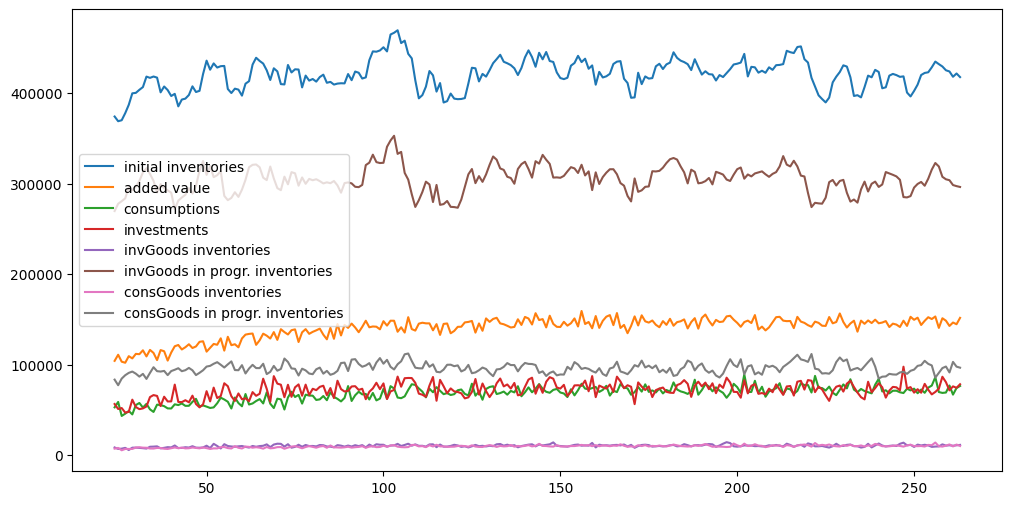

In [24]:
#allFirmData[['initial inventories', 'added value', 'consumptions',\
             #'investments','in progr. inventories','inventories']].plot(figsize=(12,6))

allFirmData[['initial inventories', 'added value', 'consumptions',\
             'investments','invGoods inventories', 'invGoods in progr. inventories',\
             'consGoods inventories', 'consGoods in progr. inventories']][24:].plot(figsize=(12,6))


In [25]:
monthlyData=allFirmData[['initial inventories', 'added value', 'consumptions',\
             'investments','invGoods inventories', 'invGoods in progr. inventories',\
             'consGoods inventories', 'consGoods in progr. inventories']][24:].to_numpy()

In [26]:
monthlyData

array([[374208.84441104, 104216.24305556,  52867.93636728, ...,
        269746.60416667,   7239.23296555,  83487.42222222],
       [369010.59440456, 110987.81111111,  58844.03454079, ...,
        277789.67777778,   8053.8803692 ,  77322.65      ],
       [370103.86696329, 103287.72777778,  43368.29535219, ...,
        280641.59166667,   5430.70723923,  84620.65555556],
       ...,
       [418124.72293761, 146593.22222223,  66927.89560508, ...,
        298486.93611111,   9712.63162308, 103077.77222222],
       [421742.84869605, 144707.64166667,  74252.03026924, ...,
        297299.94861111,  11762.90968717,  97834.26111111],
       [417763.63375122, 151742.03472222,  76487.06087338, ...,
        296373.09444444,  10193.69603601,  96690.43888889]])

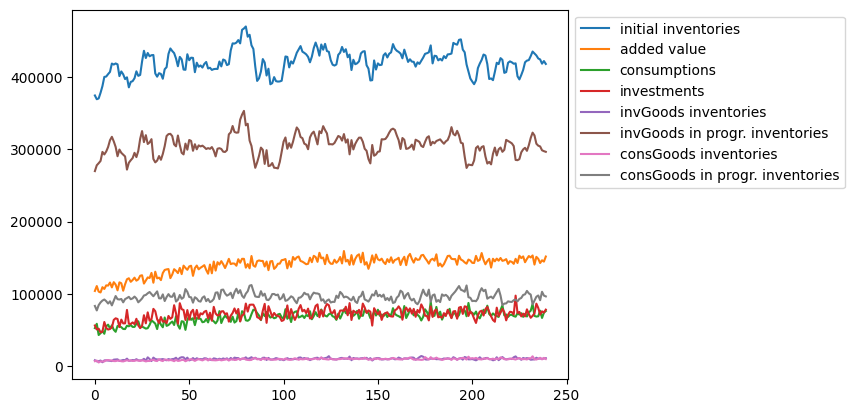

In [27]:
plt.plot(monthlyData,label=['initial inventories', 'added value', 'consumptions',\
             'investments','invGoods inventories', 'invGoods in progr. inventories',\
             'consGoods inventories', 'consGoods in progr. inventories'])
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1, 1))


In [28]:
int(len(monthlyData)/12)

20

In [29]:
len(monthlyData[0])

8

In [30]:
yearlyData = np.zeros((int(len(monthlyData)/12),len(monthlyData[0])))

In [31]:
#stock (initial or final) or flow
sf=['si','f','f','f','sf','sf','sf','sf']

In [32]:
for i in range(int(len(monthlyData)/12)):
    for j in range(len(monthlyData[0])):  #a row
        #the 1st value or the sum of 12 values or the 12th value
        ourRange=range(12*i,12*i+12) #flow
        if sf[j]=='si': ourRange=range(12*i,1+12*i)
        if sf[j]=='sf': ourRange=range(11+12*i,12+12*i)
        for k in ourRange:   
            yearlyData[i][j]+=monthlyData[k][j]

In [33]:
np.set_printoptions(suppress=True)
yearlyData

array([[ 374208.84441104, 1314903.5166667 ,  615671.64439874,
         656272.00531357,    9475.67254242,  303134.77638889,
           7345.35132297,   97212.91111111],
       [ 417168.7113654 , 1393422.43888892,  667757.48618381,
         740239.24272051,    8380.70204414,  297620.21527778,
           8058.00402805,   88535.5       ],
       [ 402594.42134997, 1467944.4402778 ,  681990.27022492,
         791269.94193734,    9801.79482902,  285392.50138889,
           8195.46435869,   93888.88888889],
       [ 397278.64946548, 1577430.01666669,  716328.75041637,
         848731.00782087,   12527.48978593,  292809.15833333,
           9001.72088676,   95310.53888889],
       [ 409648.90789492, 1627977.31250002,  758969.37026392,
         867166.33493   ,   11000.30346704,  300285.77777778,
          10125.04506729,   90079.38888889],
       [ 411490.51520099, 1671966.90416669,  787132.38789226,
         859885.88324494,    8609.15077765,  320519.54305556,
           8195.41550836,   991

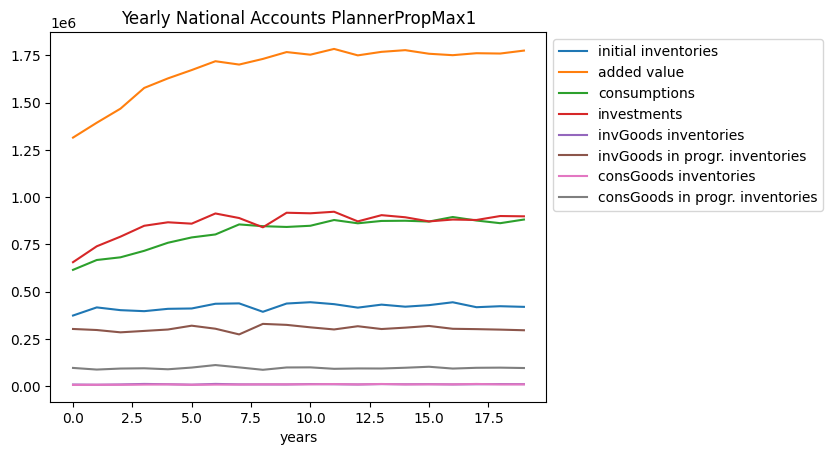

In [35]:
plt.plot(yearlyData,label=['initial inventories', 'added value', 'consumptions',\
             'investments','invGoods inventories', 'invGoods in progr. inventories',\
             'consGoods inventories', 'consGoods in progr. inventories'])
plt.title("Yearly National Accounts "+ folder)
plt.xlabel("years")
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1, 1))
os.chdir("../"+folder+".0")
plt.savefig("_"+folder+"_YearlyNationalAccounts.jpg", dpi=180, bbox_inches='tight')